In [147]:
# import packages
import numpy as np
import scipy.integrate as integrate
from sympy import *
import time

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.animation as animation

from matplotlib import cm
from matplotlib.ticker import LinearLocator
## set default plot size
plt.rcParams["figure.figsize"] = (10, 7)
## set global font size
plt.rcParams.update({'font.size':14})

import astropy.units as u
from astropy import constants as const

# The Gaia phase-space snail

Following Tremaine et al. (2023), I animate the 1D vertical oscillations of stars in a disk, modeled by a self-gravitating isothermal slab.

Eqs. 4-8 describe the dynamics of the slab, and Eq. 1 describes the time evolution of any density perturbation.

# Slab dynamics

Here, I write down Eqs. 4-8 from Tremaine et al. (2023), which includes the dynamics of the slab and the definitions of our angle-action coordinates.

First, I'll simulate just one star at an arbitrary $(\theta,J)$. Eventually, I'll sample ~10,000-100,000 stars from the distribution function Eq. 6.

## Vertical oscillation

Suppose a perturbation at time $t_i$ changes the distribution function $f$ by amplitude $f_0(J)$. Furthermore, for simplicity, only consider the perturbation's m=1 Fourier component in $\theta$. Then this perturbation evolves as:
$$f_0(J) \cos\left[\theta - \Omega(J)(t-t_i)-\theta_i\right] $$

In [4]:
## Omega definitions
def Omega_big(J, Omega_small=1/np.sqrt(2)):
    '''
    See paragraph after Eq. 8 of Tremaine et al. (2023); orbital frequency
    when the action J >> sigma*z_0. Omega_small is the limit of Omega
    when J << sigma*z_0.
    
    '''
    
    coeff = (Omega_small**2 * np.pi)**2
    coeff = (coeff / 3)**(1/3)
    return coeff * J**(-1/3)

def Omega_big_deriv(J, Omega_small=1/np.sqrt(2)):
    '''
    Derivative of the function Omega_big wrt J.
    
    '''
    
    coeff = (Omega_small**2 * np.pi)**2
    coeff = (coeff / 3)**(1/3)
    
    return coeff * (-1/3) * J**(-4/3)

def Omega_interm(J, Omega_small=1/np.sqrt(2)):
    '''
    The "intermediate" expression for Omega: it's an
    interpolation between the low-J and high-J regimes for Omega
    (represented by Omega_small and Omega_big, respectively).
    
    The interpolated function has form a/(1 + b*J^{1/3}). 
    
    '''
    
    # Omega=Omega_small for J=0
    a = Omega_small
    # coefficient in Omega_big expression
    Omega_big_coeff = Omega_big(1, Omega_small) 
    # for large J, Omega_big ~ Omega_big_coeff * J^{-1/3} ~ a/b * J^{-1/3}
    b = a / Omega_big_coeff

    return a / (1 + b*(J**(1/3)))
    

def Omega(J):
    '''
    Eq. 8 of Tremaine et al. (2023); orbital frequency. Refer to notes on 
    notation and definitions (e.g., definition of Omega_small, setting
    z_0 = 0).
    
    '''
    
    Omega_small = 1 / np.sqrt(2) # norm'd s.t. sigma*z_0=1
    
    return Omega_interm(J, Omega_small) 

def dOmega_dJ(J, Omega_small=1/np.sqrt(2)):
    '''
    Derivative of Omega(J), assuming that Omega(J) = a/(1 + b*J^{1/3}). I got
    this expression from Wolfram Alpha.
    
    '''
    
    # Omega=Omega_small for J=0
    a = Omega_small 
    # coefficient in Omega_big expression
    Omega_big_coeff = Omega_big(1, Omega_small) 
    # for large J, Omega_big ~ Omega_big_coeff * J^{-1/3} ~ a/b * J^{-1/3}
    b = a / Omega_big_coeff
    
    expr1 = -a * b * J**(-2/3) / 3
    expr2 = (b*J**(1/3) + 1)**2

    return expr1 / expr2

In [62]:
def delta_f(theta, J, t, A_0=1, t_i=0, theta_i=0):
    '''
    Eq. 1 of Tremaine et al. (2023). Suppose a perturbation
    at time t_i changes the distribution function f
    by amplitude A_0. For simplicity, only consider the 
    m=1 Fourier component in theta. Then, as a function of time,
    this perturbation evolves as:
    
    delta_f(theta,J,t) = A_0 * cos[theta - Omega(J)(t-t_i) - theta_i]
    
    '''
        
    phase = theta - Omega(J)*(t-t_i) - theta_i
    
    return A_0 * np.cos(phase)

## 2D animation

Adapting my code from my "Phase Mixing Plots" notebook.

Sources for using FuncAnimation instead of ArtistAnimation:

https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html

https://stackoverflow.com/questions/18274137/how-to-animate-text-in-matplotlib

## sanity check: plot $\delta f$ as $\Omega$ vs. $\theta$

In [34]:
def delta_f_Omega_explicit(theta, Omega, t, A_0=1, t_i=0, theta_i=0):
    '''
    Same as delta_f, but we explicitly define Omega instead of 
    calculating it via J.
    
    delta_f(theta,J,t) = A_0 * cos[theta - Omega(J)(t-t_i) - theta_i]
    
    '''
        
    phase = theta - Omega*(t-t_i) - theta_i
    
    return A_0 * np.cos(phase)

In [39]:
# Omega_J_min = Omega(J_min)
# Omega_J_max = Omega(J_max)

# # time range
# tmin = 0
# tmax = 10 # in Fig. 3, the time T-t_i goes to 100
# tstep = 0.5
# ts = np.arange(tmin, tmax, tstep)

# # phase space (angle vs. action) grid
# theta_min = 0
# theta_max = 2*np.pi
# Omega_min = 0.
# Omega_max = 0.7
# step = 2e-2

# thetas = np.arange(theta_min, theta_max, theta_max/50)
# Omegas = np.arange(Omega_min, Omega_max, step)
# thetas, Omegas = np.meshgrid(thetas, Omegas)

0
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


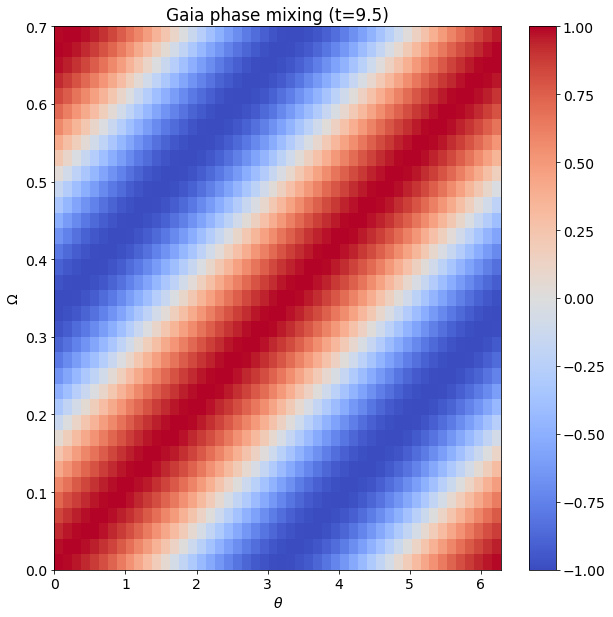

In [40]:
## plot delta_f in Omega vs. theta space
fig, ax = plt.subplots(1,1,figsize=(10,10))

# initialize the color bar
im = ax.imshow(delta_f_Omega_explicit(thetas, Omegas, t=0), cmap=cm.coolwarm, animated=True)
fig.colorbar(im)

# the overdensity at theta=0 as a function of time; ie, delta_n(theta=0, t)
delta_n_array = []

def updatefig(num):
    print(num)
    global im
    t = ts[num]
    Z = delta_f_Omega_explicit(thetas, Omegas, t)
    delta_n = np.sum(Z[:, 0]) # integrate over J
    delta_n_array.append(delta_n)
    
    ax.set_title('Gaia phase mixing (t=' + str(t) + ')')
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$\Omega$')
    
    ## plot delta_f in J vs. theta phase space
    im = ax.imshow(Z, cmap=cm.coolwarm, origin='lower', \
                   extent=(theta_min, theta_max, Omega_min, Omega_max), animated=True, \
                   aspect='auto') # automatically set plot's aspect ratio

    
    return im,


ani = animation.FuncAnimation(fig, updatefig, frames=len(ts), interval=100, blit=True)

ani.save("Gaia_phase_mixing_func_temp.mp4")

## plot $\delta f$ in angle-action coords

In [127]:
## set bounds for t, theta, and J

# time range
tmin = 0
tmax = 100 # in Fig. 3, the time T-t_i goes to 100
tstep = 0.5
ts = np.arange(tmin, tmax, tstep)

# phase space (angle vs. action) grid
theta_min = 0
theta_max = 2*np.pi
theta_step = theta_max/100

J_min = 1e-5
# in Scott's paper, the max. value of (v/sigma)*(z/z_0) ~ 20 in Fig. 3, and 
# we norm'd s.t. sigma*z_0=1. from eq. 7, J is roughly prop to v*z 
J_max = 10 
step = 1e-2

thetas = np.arange(theta_min, theta_max, theta_step)
Js = np.arange(J_min, J_max, step)
thetas, Js = np.meshgrid(thetas, Js)

# test that delta_f can take in a meshgrid
Z = delta_f(thetas, Js, 0.)

### define sqrt scale
Source: https://stackoverflow.com/questions/42277989/square-root-scale-using-matplotlib-python

In [8]:
## define square root scale for y axis
import matplotlib.scale as mscale
import matplotlib.transforms as mtransforms
import matplotlib.ticker as ticker

class SquareRootScale(mscale.ScaleBase):
    """
    ScaleBase class for generating square root scale.
    """
 
    name = 'squareroot'
 
    def __init__(self, axis, **kwargs):
        # note in older versions of matplotlib (<3.1), this worked fine.
        # mscale.ScaleBase.__init__(self)

        # In newer versions (>=3.1), you also need to pass in `axis` as an arg
        mscale.ScaleBase.__init__(self, axis)
 
    def set_default_locators_and_formatters(self, axis):
        axis.set_major_locator(ticker.AutoLocator())
        axis.set_major_formatter(ticker.ScalarFormatter())
        axis.set_minor_locator(ticker.NullLocator())
        axis.set_minor_formatter(ticker.NullFormatter())
 
    def limit_range_for_scale(self, vmin, vmax, minpos):
        return  max(0., vmin), vmax
 
    class SquareRootTransform(mtransforms.Transform):
        input_dims = 1
        output_dims = 1
        is_separable = True
 
        def transform_non_affine(self, a): 
            return np.array(a)**0.5
 
        def inverted(self):
            return SquareRootScale.InvertedSquareRootTransform()
 
    class InvertedSquareRootTransform(mtransforms.Transform):
        input_dims = 1
        output_dims = 1
        is_separable = True
 
        def transform(self, a):
            return np.array(a)**2
 
        def inverted(self):
            return SquareRootScale.SquareRootTransform()
 
    def get_transform(self):
        return self.SquareRootTransform()
 
mscale.register_scale(SquareRootScale)

In [ ]:
## phase mixing animation (J vs theta)
fig, ax = plt.subplots(1,1,figsize=(10,10))

# initialize the color bar
im = ax.imshow(delta_f(thetas, Js, t=0), cmap=cm.coolwarm, animated=True)
fig.colorbar(im)

# the overdensity at theta=0 as a function of time; ie, delta_n(theta=0, t)
delta_n_array = []

def updatefig(num):
    print(num)
    global im
    t = ts[num]
    Z = delta_f(thetas, Js, t)
    delta_n = np.sum(Z[:, 0]) # integrate over J
    delta_n_array.append(delta_n)
    
    ax.set_title('Gaia phase mixing (t=' + str(t) + ')')
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$J$')
    
    ## scale the J axis to be linear in sqrt(J)
    ax.set_yscale('squareroot')
    ax.set_yticks(np.arange(J_min, J_max, 1))
    ax.set_yticks(np.arange(J_min, J_max, 0.5), minor=True)
    
    ## plot delta_f in J vs. theta phase space
    im = ax.imshow(Z, cmap=cm.coolwarm, origin='lower', \
                   extent=(theta_min, theta_max, J_min, J_max), animated=True, \
                   aspect='auto') # automatically set plot's aspect ratio

    
    return im,


ani = animation.FuncAnimation(fig, updatefig, frames=len(ts), interval=100, blit=True)

ani.save("Gaia_phase_mixing_func_temp.mp4")

In [ ]:
# density at theta=0
plt.plot(ts, delta_n_array[2:])

## Plotting $\delta f$ in polar coordinates

For now, I'll assume that vertical position $z$ corresponds to $\sqrt{J} \cos\theta$ and vertical velocity $v_z$ corresponds to $\sqrt{J} \sin\theta$. This isn't completely accurate because this assumes harmonic oscillations, while our system has an anharmonic oscillations. However, I'm making this assumption just so that I set up the code for integrating over $v_z$.

Python conversion between coordinates: https://stackoverflow.com/questions/20924085/python-conversion-between-coordinates

Imshow in polar coordinates: https://stackoverflow.com/questions/54209640/imshow-in-polar-coordinates

Using set_array to (properly) update the data in the figure at each timestep: https://stackoverflow.com/questions/18797175/animation-with-pcolormesh-routine-in-matplotlib-how-do-i-initialize-the-data

And a very detailed animation example: http://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/

In [123]:
## convert our (thetas, Js) to (x_vals, y_vals)

def pol2cart_meshgrid(thetas, Js):
    '''
    Given a meshgrid of angles and actions (thetas, Js), return the 
    corresponding meshgrid in Cartesian coordinates.
    
    '''
    
    xs = np.sqrt(Js) * np.cos(thetas)
    ys = np.sqrt(Js) * np.sin(thetas)
    
    return xs, ys

# thetas, Js are generated from a meshgrid 
x_vals, y_vals = pol2cart_meshgrid(thetas, Js)

<ipython-input-128-fa3e3c9f516b>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  quad1 = ax.pcolormesh(x_vals,y_vals,Z, cmap=cm.coolwarm, animated=True)


t = 0.0
Elapsed t: 0.4 seconds
t = 0.0
Elapsed t: 0.6 seconds
t = 0.0
Elapsed t: 0.6 seconds
t = 2.0
Elapsed t: 2.2 seconds
t = 4.0
Elapsed t: 3.8 seconds
t = 6.0
Elapsed t: 5.6 seconds
t = 8.0
Elapsed t: 7.3 seconds
t = 10.0
Elapsed t: 9.0 seconds
t = 12.0
Elapsed t: 10.7 seconds
t = 14.0
Elapsed t: 12.5 seconds
t = 16.0
Elapsed t: 14.2 seconds
t = 18.0
Elapsed t: 15.8 seconds
t = 20.0
Elapsed t: 17.6 seconds
t = 22.0
Elapsed t: 19.3 seconds
t = 24.0
Elapsed t: 21.2 seconds
t = 26.0
Elapsed t: 23.5 seconds
t = 28.0
Elapsed t: 25.4 seconds
t = 30.0
Elapsed t: 27.2 seconds
t = 32.0
Elapsed t: 28.9 seconds
t = 34.0
Elapsed t: 30.6 seconds
t = 36.0
Elapsed t: 32.4 seconds
t = 38.0
Elapsed t: 34.4 seconds
t = 40.0
Elapsed t: 36.0 seconds
t = 42.0
Elapsed t: 37.8 seconds
t = 44.0
Elapsed t: 39.5 seconds
t = 46.0
Elapsed t: 41.3 seconds
t = 48.0
Elapsed t: 42.9 seconds
t = 50.0
Elapsed t: 44.6 seconds
t = 52.0
Elapsed t: 46.5 seconds
t = 54.0
Elapsed t: 48.2 seconds
t = 56.0
Elapsed t: 49.8 

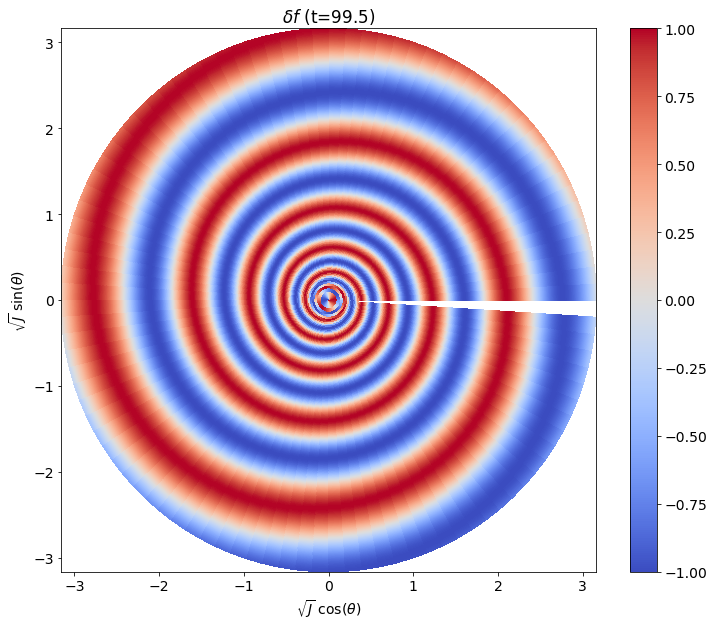

In [128]:
fig, ax = plt.subplots(1,1,figsize=(12,10))

Z = delta_f(thetas, Js, 0)
# quad mesh
quad1 = ax.pcolormesh(x_vals,y_vals,Z, cmap=cm.coolwarm, animated=True)
fig.colorbar(quad1, ax=ax)

ax.set_xlabel(r"$\sqrt{J}$ cos($\theta$)")
ax.set_ylabel(r"$\sqrt{J}$ sin($\theta$)")

def init():
    quad1.set_array([])
    return quad1

start = time.time()

def updatefig(num):
    # global im
    t = ts[num]
    if ((t % 5) == 0):
        print("t = " + str(t))
        print(f'Elapsed t: {np.round(time.time() - start, 1)} seconds')

    Z = delta_f(thetas, Js, t)
    
    delta_n = np.sum(Z[:, 0]) # integrate over J
    delta_n_array.append(delta_n)
        
    ## plot delta_f in J vs. theta phase space
    Z = Z[:-1, :-1]
    quad1.set_array(Z.ravel())
    
    ax.set_title('$\delta f$ (t=' + str(t) + ')')

    # im = ax.pcolormesh(x_vals,y_vals,Z, cmap=cm.coolwarm, animated=True)
    
    return quad1,


ani = animation.FuncAnimation(fig, updatefig, interval=100, frames=len(ts), blit=True)

ani.save("Gaia_pm_polar_temp.mp4")

In [ ]:
## plotting the Gaia phase mixing snail at 1 timepoint
plt.clf()
fig, ax = plt.subplots(1,1,figsize=(12,10))

# test that we can plot delta_f at a given t
Z = delta_f(thetas, Js, 25.5)

im = ax.pcolormesh(x_vals,y_vals,Z,cmap=cm.coolwarm, animated=True)

fig.colorbar(im, ax=ax)

ax.set_xlabel(r"$\sqrt{J}$ cos($\theta$)")
ax.set_ylabel(r"$\sqrt{J}$ sin($\theta$)")
ax.set_title("$\delta f$")

plt.show()

# Plotting the echo term

In [129]:
## definitions for Hamiltonian and f0 (and its derivatives)
def Hamiltonian(J, Omega_small=1/np.sqrt(2)):
    '''
    Computes the Hamiltonian of our system by integrating Omega(J)
    from 0 to J. (Underneath Eq. 8 in Scott's paper, it's stated that
    Omega = dH/dJ.) We assume that Omega=0 for H=0.
    
    Also, we use Omega = a/(1 + b*J^{1/3}). I got the form of the 
    integral from Wolfram Alpha.
    
    
    '''
    
    # Omega=Omega_small for J=0
    a = Omega_small 
    # coefficient in Omega_big expression
    Omega_big_coeff = Omega_big(1, Omega_small) 
    # for large J, Omega_big ~ Omega_big_coeff * J^{-1/3} ~ a/b * J^{-1/3}
    b = a / Omega_big_coeff
    
    expr1 = b*J**(1/3) * (b*J**(1/3) - 2)
    expr2 = 2*np.log(b*J**(1/3) + 1)
    numerator = 3*a*(expr1 + expr2)
    denominator = 2 * b**3
    
    return numerator/denominator

def f_0(J): 
    '''
    Initial distribution function of our system, using Eq. 6 of Scott's
    paper (ignoring the constant coefficient).
    
    '''
    
    return np.exp(-1*Hamiltonian(J))

def df0_dJ(J):
    '''
    The derivative of our initial distribution function, f_0(J) ~ exp(-H(J)). 
    We have df_0/dJ = -dH/dJ * exp(-H) = -Omega(J) * exp(-H).
    
    '''
    
    return -Omega(J) * np.exp(-1*Hamiltonian(J))

def f0_second_deriv(J):
    '''
    The derivative of our initial distribution function, f_0(J) ~ exp(-H(J)). 
    By product rule, taking the derivative of df_0/dJ yields:
    
    -dOmega/dJ * exp(-H) + -Omega * [-dH/dJ * exp(-H)] = -dOmega/dJ * exp(-H) + (Omega^2)*exp(-H)
    = (-dOmega/dJ + Omega^2) * exp(-H)
    
    '''
        
    coeff = Omega(J)**2 - dOmega_dJ(J)
    
    return coeff * np.exp(-1*Hamiltonian(J))

In [130]:
def delta_f_2nd_order(theta, J, t, t2=15):
    '''
    Represents the closed form of the second-order solution for delta_f 
    given two hammers. See the last equations in Section 7.3 in my senior thesis 
    notes.
    
    
    '''
    
    n1, n2 = 1, 2
    t1 = 5
    t_echo = (n2*t2 - n1*t1) / (n2 - n1)
    
    # amplitudes of hammers; for now, assume they're independent of J
    # could use SymPy or something similar to evaluate the d/dJ derivatives
    A1, A2 = 0.1, 0.2
    
    # function that contains the time evolution
    psi = (n2 - n1) * (theta - Omega(J)*(t - t_echo))
    
    # form of delta_f^(2) that assumes constant A_1, A_2
    
    expr1 = 2*A1*A2 * np.cos(psi) * n1*n2* f0_second_deriv(J)
    expr2 = 2*A1*A2 * np.sin(psi) * n1**2 * n2 * (t2-t1) * dOmega_dJ(J) * df0_dJ(J)
    
    return expr1 - expr2

In [135]:
# time range
tmin = 15 # echo term is only nonzero for t>t2
tmax = 35 # in Matt's animation, t goes to 35
tstep = .5
ts = np.arange(tmin, tmax+tstep, tstep)

# phase space (angle vs. action) grid
theta_min = 0
theta_max = 2*np.pi
theta_step = theta_max/70

J_min = 1e-5
# in Scott's paper, the max. value of (v/sigma)*(z/z_0) ~ 20 in Fig. 3, and 
# we norm'd s.t. sigma*z_0=1. from eq. 7, J is roughly prop to v*z 
J_max = 5
J_step = 0.1

thetas = np.arange(theta_min, theta_max, theta_step)
Js = np.arange(J_min, J_max, J_step)
thetas, Js = np.meshgrid(thetas, Js)

# thetas, Js are generated from a meshgrid 
x_vals, y_vals = pol2cart_meshgrid(thetas, Js)

Symmetric log for the color bar: https://matplotlib.org/stable/users/explain/colors/colormapnorms.html#symmetric-logarithmic

In [139]:
Z = delta_f_2nd_order(thetas, Js, 30, t2=25)
np.min(np.abs(Z))

6.264114921183863e-06

In [149]:
## working example with symlog
N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolormesh(X, Y, Z,
                       norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
                                              vmin=-1.0, vmax=1.0, base=10),
                       cmap='RdBu_r', shading='auto')
fig.colorbar(pcm, ax=ax[0], extend='both')

pcm = ax[1].pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z), shading='auto')
fig.colorbar(pcm, ax=ax[1], extend='both')
plt.show()

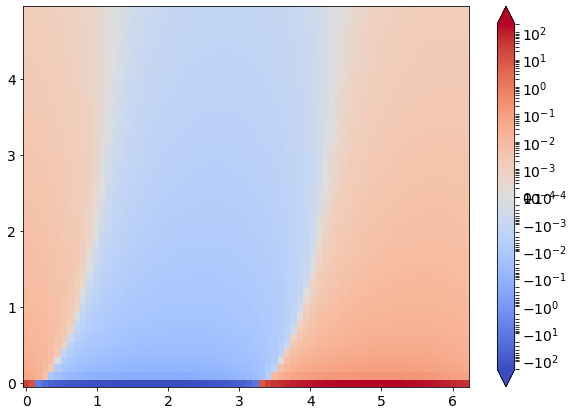

In [182]:
Z = delta_f_2nd_order(thetas, Js, 25, t2=15)

fig, ax = plt.subplots(1, 1)

im = ax.pcolormesh(thetas, Js, Z, norm=colors.SymLogNorm(linthresh=1e-4, linscale=1e-4,\
                               base=10),\
                       cmap=cm.coolwarm, shading='auto')
fig.colorbar(im, ax=ax, extend='both')

plt.show()

t = 16.0
Elapsed t: 0.5 seconds
t = 18.0
Elapsed t: 1.0 seconds
t = 20.0
Elapsed t: 1.5 seconds
t = 22.0
Elapsed t: 1.9 seconds
t = 24.0
Elapsed t: 2.4 seconds
t = 26.0
Elapsed t: 2.8 seconds
t = 28.0
Elapsed t: 3.3 seconds
t = 30.0
Elapsed t: 3.7 seconds
t = 32.0
Elapsed t: 4.2 seconds
t = 34.0
Elapsed t: 4.7 seconds


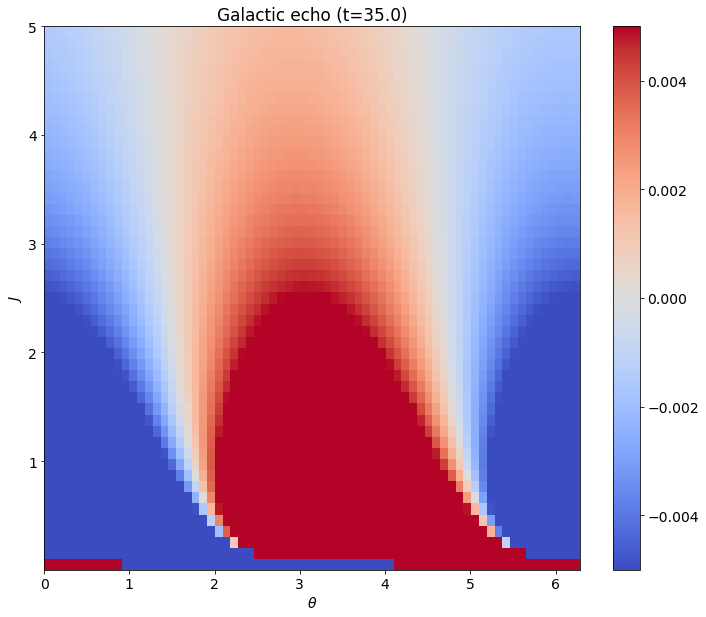

In [136]:
fig, ax = plt.subplots(1,1,figsize=(12,10))

# initialize the color bar
im = ax.imshow(Z, cmap=cm.coolwarm, vmin=-5e-3, vmax=5e-3, origin='lower', \
                   extent=(theta_min, theta_max, J_min, J_max), animated=True, \
                   aspect='auto') # automatically set plot's aspect ratio
fig.colorbar(im)

ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$J$")

# the overdensity at theta=0 as a function of time; ie, delta_n(theta=0, t)
delta_n_array = []

def init():
    im.set_data([])
    return im

start = time.time()
def updatefig(num):
    
    t = ts[num]
    if ((t % 2) == 0):
        print("t = " + str(t))
        print(f'Elapsed t: {np.round(time.time() - start, 1)} seconds')
        
    Z = delta_f_2nd_order(thetas, Js, t)
    
    delta_n = np.sum(Z[:, 0]) # integrate over J
    delta_n_array.append(delta_n)
    
    ## plot delta_f in J vs. theta phase space
    Z = Z[:-1, :-1]
    im.set_data(Z)
    
    ax.set_title('Galactic echo (t=' + str(t) + ')')
    
#     im = ax.imshow(Z, cmap=cm.coolwarm, vmin=-5e-3, vmax=5e-3, origin='lower', \
#                    extent=(theta_min, theta_max, J_min, J_max), animated=True, \
#                    aspect='auto') # automatically set plot's aspect ratio
    return im,


ani = animation.FuncAnimation(fig, updatefig, frames=len(ts), interval=100, blit=True)

ani.save("gal_echo_temp.mp4")

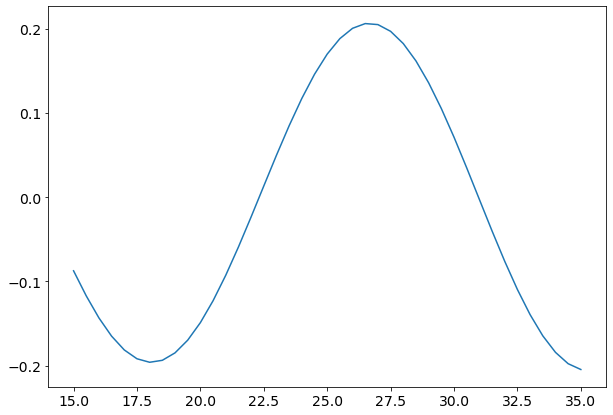

In [104]:
# density at theta=0
plt.plot(ts, delta_n_array[2:])